# Solutions for Homework 3 - NumPy, SymPy and plotting
**Due: Oct 11** 

***Total Points: 100***

For full points, your code
- must run without errors
- must by *pythonic*
- must be easily understandable, and well documented (either through inline comments or markdown).
- ***All plots must have clearly and meaningfully labeled axes, unless you are simply plotting arbitrary numbers. Add legends where needed.***
- ***Use separate markdown cells for any text answers.***
- ***Show your work, i.e, print all relevant output.*** Remember that having a variable in the last line of a jupyter cell block automatically prints it's value. ***You can use multiple code blocks for a single question.***

Remember to export your Jupyter notebook as a PDF file and upload both to Canvas.
```
File > Save and Export Notebook As... > PDF
```

Run every code block (and make sure the answer if fully visible) before submitting your notebook/PDF.

## Question 0

Import all the libraries you need (`numpy`, `sympy`, `matplotlib`) in this notebook here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

## Question 1
*20 points*

### Question 1.1

*5 points*

Create the following 2D array using `numpy` functions, without typing it out explicitly. Pay attention to the data type.
```
[[ 11,  60, 110, 160, 210],
 [ 20,  71, 120, 170, 220],
 [ 30,  80, 131, 180, 230],
 [ 40,  90, 140, 191, 240],
 [ 50, 100, 150, 200, 251]]
```

In [2]:
a = np.linspace(10, 250, 25, dtype=int)
a = a.reshape([5, 5]).T
a

array([[ 10,  60, 110, 160, 210],
       [ 20,  70, 120, 170, 220],
       [ 30,  80, 130, 180, 230],
       [ 40,  90, 140, 190, 240],
       [ 50, 100, 150, 200, 250]])

In [3]:
b = np.eye(5, dtype=int)
b

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [4]:
c = a + b
c

array([[ 11,  60, 110, 160, 210],
       [ 20,  71, 120, 170, 220],
       [ 30,  80, 131, 180, 230],
       [ 40,  90, 140, 191, 240],
       [ 50, 100, 150, 200, 251]])

### Question 1.2

*10 points*

Divide each **column** of the 2D array shown above, elementwise, with the following array: `[10, 20, 30, 40, 50]`. Do not create this array explicitly either. Use a `numpy` function. Do NOT use a loop.

Hint: Simply dividing the two arrays in their given forms will perform an elementwise division by **row**. This is NOT what we want. Instead, we want elementwise division by **column**. Every element in the first row should be divided by 10, every element in the second row by 20, and so on.

In [5]:
d = np.arange(10, 60, 10)
d

array([10, 20, 30, 40, 50])

In [6]:
d = d[:, np.newaxis]
d

array([[10],
       [20],
       [30],
       [40],
       [50]])

In [7]:
e = c / d
e

array([[ 1.1       ,  6.        , 11.        , 16.        , 21.        ],
       [ 1.        ,  3.55      ,  6.        ,  8.5       , 11.        ],
       [ 1.        ,  2.66666667,  4.36666667,  6.        ,  7.66666667],
       [ 1.        ,  2.25      ,  3.5       ,  4.775     ,  6.        ],
       [ 1.        ,  2.        ,  3.        ,  4.        ,  5.02      ]])

### Question 1.3

*5 points*

Plot the resultant array from Q1.2.

What does that tell you about how `matplotlib` deals with a 2D array as input?

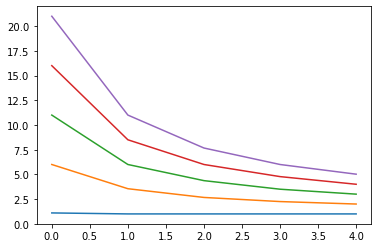

In [8]:
plt.plot(e)

**Answer:** With a 2D array as input, `matplotlib` create multiple lines, spliting the data by column. The `y` values correspond to each "column vector". The `x` values is basically the same as `range(array.shape[0])`.

## Question 2
*10 points*

Assuming a body has the following displacement function, obtain (and print) its velocity and acceleration functions symbolically. Also plot all three functions from $t=0$ to $t=1$.

$$x = 2t^3+ \frac{e^t sinh(t)}{cos(t)}$$

You must calculate the velocity field using python, though you can always verify your answer by hand.

In [9]:
# Declare symbol
t = sym.symbols('t')

# Create displacement expression
x = 2 * t ** 3 + sym.exp(t) * sym.sinh(t) / sym.cos(t)
x

2*t**3 + exp(t)*sinh(t)/cos(t)

In [10]:
# Obtain velovity
u = x.diff(t)
u

6*t**2 + exp(t)*sin(t)*sinh(t)/cos(t)**2 + exp(t)*sinh(t)/cos(t) + exp(t)*cosh(t)/cos(t)

In [11]:
# Obtain acceleration
a = u.diff(t)
a

12*t + 2*exp(t)*sin(t)**2*sinh(t)/cos(t)**3 + 2*exp(t)*sin(t)*sinh(t)/cos(t)**2 + 2*exp(t)*sin(t)*cosh(t)/cos(t)**2 + 3*exp(t)*sinh(t)/cos(t) + 2*exp(t)*cosh(t)/cos(t)

In [12]:
# Convert all expressions to numpy array
points = np.linspace(0, 1, 20)
f = sym.lambdify(t, x, "numpy")
g = sym.lambdify(t, u, "numpy")
h = sym.lambdify(t, a, "numpy")

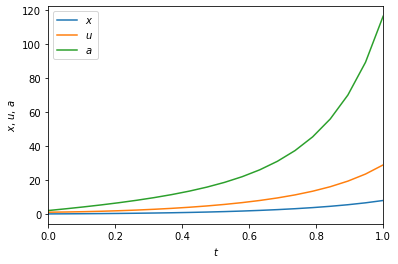

In [13]:
# Plot displacement
plt.plot(points, f(points), label=r"$x$")
# Plot velocity
plt.plot(points, g(points), label=r"$u$")
# Plot acceleration
plt.plot(points, h(points), label=r"$a$")

plt.xlabel(r"$t$")
plt.ylabel(r"$x$, $u$, $a$")
plt.xlim(0, 1);
plt.legend();

## Question 3
*30 points*

### Question 3.1
*10 points*

For a simple projectile motion problem, graphically show the following as a function of launch angle (in degrees):
- Time of flight
- Maximum height of projectile
- Range of projectile

Comment on the answers.

Ignore aerodynamic drag. Use SI units, and assume any initial velocity.

In [14]:
# We assume an initial velocity of unity (v0 = 1) for simplicity.

# Gravitational acceleration 
g = 9.81  # m/s

# Create an array for launch angles
angles = np.arange(0, 181)

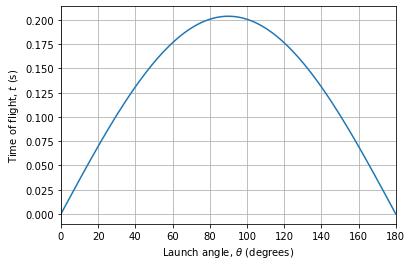

In [15]:
# Time of flight
t = 2 * np.sin(np.radians(angles)) / g  # convert to radians

# Plot
plt.plot(angles, t)
plt.xlabel(r"Launch angle, $\theta$ (degrees)")
plt.ylabel(r"Time of flight, $t$ (s)")
plt.xlim(0, 180)
plt.grid(True)

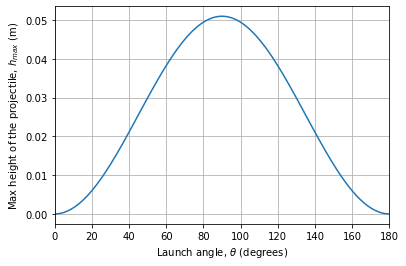

In [16]:
# Maximum height of projectile
h = np.sin(np.radians(angles)) ** 2 / (2 * g)  # convert to radians

# Plot
plt.plot(angles, h)
plt.xlabel(r"Launch angle, $\theta$ (degrees)")
plt.ylabel(r"Max height of the projectile, $h_{max}$ (m)")
plt.xlim(0, 180)
plt.grid(True)

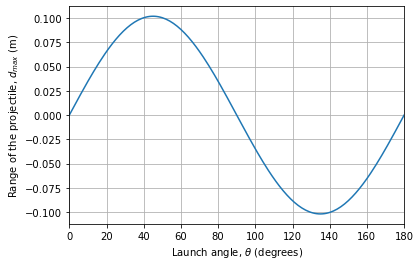

In [17]:
# Range of projectile
d = np.sin(2 * np.radians(angles)) / g  # convert to radians

# Plot
plt.plot(angles, d)
plt.xlabel(r"Launch angle, $\theta$ (degrees)")
plt.ylabel(r"Range of the projectile, $d_{max}$ (m)")
plt.xlim(0, 180)
plt.grid(True)

**Answer:** The maximum height and time of flight is obtained when $\theta = 90^\circ$. At this launch angle, the range is minimum ($0$). The maximum range is obtained when $\theta = 45^\circ$ in either direction.

### Question 3.2
*15 points*

Solve the problem above symbolically, to obtain the launch angle (in radians) to maximize:
- Time of flight
- Maximum height of projectile
- Range of projectile

Ignore aerodynamic drag. Use the interval $[0 \text{ } \pi]$

Hints:
- Check the documentation for using `solveset` with an `Interval`.
- Make sure you check the second derivative (at each point in the solution) to verify if you are at a maxima or minima.

In [18]:
# Declare symbols - defining them to be real and positive is not needed, but it will help us later
theta, v, g = sym.symbols('theta v_0 g', positive=True, real=True)

**Time of flight**

In [19]:
t = 2 * v * sym.sin(theta) / g
t

2*v_0*sin(theta)/g

In [20]:
# Equate first derivative to zero to check find the locations for extrema
t_ex = sym.solveset(t.diff(theta), theta, sym.Interval(0, sym.pi))
t_ex

{pi/2}

In [21]:
# Check second derivative to see if the point above is at a maximum or a minimum
dt = t.diff(theta, 2)
dt

-2*v_0*sin(theta)/g

In [22]:
# Negative second derivative indicates maximum
dt.subs(theta, sym.pi / 2)

-2*v_0/g

**Answer:** The time of flight is maximum at $\theta = \pi/2$.

**Maximum height of projectile**

In [23]:
h = v ** 2 * sym.sin(theta) ** 2 / (2 * g)
h

v_0**2*sin(theta)**2/(2*g)

In [24]:
# Equate first derivative to zero to check find the locations for extrema
h_ex = sym.solveset(h.diff(theta), theta, sym.Interval(0, sym.pi))
h_ex

{0, pi/2, pi}

In [25]:
# Check second derivative to see if the points above are at a maxima or a minima
dh = h.diff(theta, 2)
dh

-v_0**2*(sin(theta)**2 - cos(theta)**2)/g

In [26]:
# Positve second derivative indicates minimum
dh.subs(theta, 0)

v_0**2/g

In [27]:
# Negative second derivative indicates maximum
dh.subs(theta, sym.pi / 2)

-v_0**2/g

In [28]:
# Postive second derivative indicates minimum
dh.subs(theta, sym.pi)

v_0**2/g

**Answer:** The height of flight is maximum at $\theta = \pi/2$.

Realistically, there is no need to check for $\theta=0$ and $\theta=\pi$, since we can see from the expression for height that it is $0$ at these angles. (It's also obvious)

**Range of projectile**

In [29]:
d = v ** 2 * sym.sin(2 * theta) / g
d

v_0**2*sin(2*theta)/g

In [30]:
# Equate first derivative to zero to check find the locations for extrema
d_ex = sym.solveset(d.diff(theta), theta, sym.Interval(0, sym.pi))
d_ex

{pi/4, 3*pi/4}

In [31]:
# Check second derivative to see if the points above are at a maxima or a minima
dd = d.diff(theta, 2)
dd

-4*v_0**2*sin(2*theta)/g

In [32]:
# Negative second derivative indicates maximum
dd.subs(theta, sym.pi / 4)

-4*v_0**2/g

In [33]:
# Positve second derivative indicates minimum
dd.subs(theta, 3 * sym.pi / 4)

4*v_0**2/g

**Answer:** The range of the projectile is maximum at $\pi/4$.

**Alternative (quicker) option:**

(Only shown for range here)

Test the second derivative by loopsing over the set returned by `solveset`.

In [34]:
dd_ex = [dd.subs(theta, ex_point) for ex_point in d_ex]  # evaluate 2nd derivate at all points in solution

maxima, minima = [], []
for theta_ex, dd_expr in zip(d_ex, dd_ex):
    if dd_expr < 0:  # maxima
        maxima.append(theta_ex)
    elif dd_expr > 0:  # minima
        minima.append(theta_ex)

maxima

[pi/4]

### Question 3.3
*5 points*

For a launch angle, $\theta = 65^\circ$ and a launch velocity, $v_0 = 25 \text{ m/s}$, plot the following:
- Postion of the projectile in $x-y$ space during its flight.
- $x$ and $y$ velocities as a function of time.

In [35]:
# Launch parameters
theta = 65 * np.pi / 180  # radians
v_0 = 25  # m/s
g = 9.81  # m/s^2

# Time of flight
t_max = 2 * v_0 * np.sin(theta) / g
t_max

# Create an array for time
t = np.linspace(0, t_max, 25)

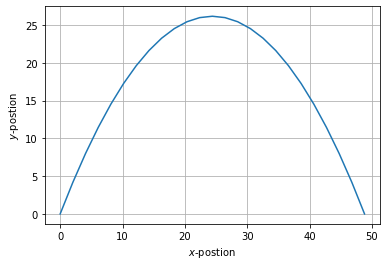

In [36]:
# x and y positions
x = v_0 * t * np.cos(theta)
y = v_0 * t * np.sin(theta) - 0.5 * g * t ** 2

# Plot
plt.plot(x, y)
plt.xlabel("$x$-postion")
plt.ylabel("$y$-postion")
plt.grid(True)

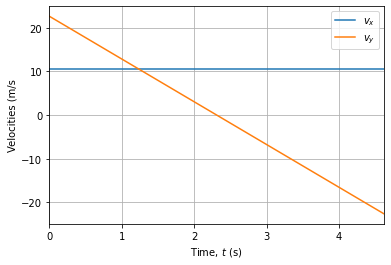

In [37]:
# x and y components of vel
v_x = v_0 * np.cos(theta) + 0 * t
v_y = v_0 * np.sin(theta) - g * t

# Plot
plt.plot(t, v_x, label="$v_x$")
plt.plot(t, v_y, label="$v_y$")
plt.xlim(0, t_max)
plt.xlabel("Time, $t$ (s)")
plt.ylabel("Velocities (m/s")
plt.legend()
plt.grid(True)

## Question 4
*30 points*

### Question 4.1
*15 points*

A compression test is peformed on a rectangular prismatic brittle specimen (cross-section area = 4x4 mm, length = 6 mm). Import the data from the provided `UTM_data.csv` file (time is in $s$, displacement is in $\mu m$, force is in $N$), and create the following using 4 subplots:
```
1. Force vs Displacement (cleaned data)    2. Strain vs Time
3. Stress vs Strain                        4. Stress vs Time
```

Modify the Figure attributes as needed to create easily readable plots.

Note that, for this type of test, the initial data corresponds to a period where the loading platen has not yet made contact with the specimen (and hence, the force is zero). Hence, the data must be cleaned before analysis. Data prior to the point where the specimen is loaded must be discarded, and the displacement (and time) reset to 0 when the specimen loading actually begins.

In [38]:
# Import CSV file
data = np.genfromtxt("UTM_data.csv", delimiter=",", skip_header=1)
data

array([[ 0.00000000e+00, -3.10418315e-02, -2.63397996e-01],
       [ 1.00000000e-02, -5.73786799e-02,  1.33588824e+00],
       [ 2.00000000e-02, -4.34625128e-02,  1.13580547e+00],
       ...,
       [ 1.90340000e+02,  1.91163439e+01,  2.21369806e+03],
       [ 1.90350000e+02,  1.90625769e+01,  2.21515940e+03],
       [ 1.90360000e+02,  1.90503111e+01,  2.21319688e+03]])

In [39]:
# A method to easily follow what is happening

# Separate time, displacement and force arrays
t = data[:, 0]  # s
d = data[:, 1]  # um
f = data[:, 2]  # N

# Clean data by removing all indexes where force < 10 N
threshold = 10
t = t[f > threshold]
d = d[f > threshold]
f = f[f > threshold]

In [40]:
# A concise (but slightly slower) alternative for the above
threshold = 10
clean_data = data[data[:, 2] > threshold]  # clean data
t, d, f = clean_data.T  # separate into 1D arrays

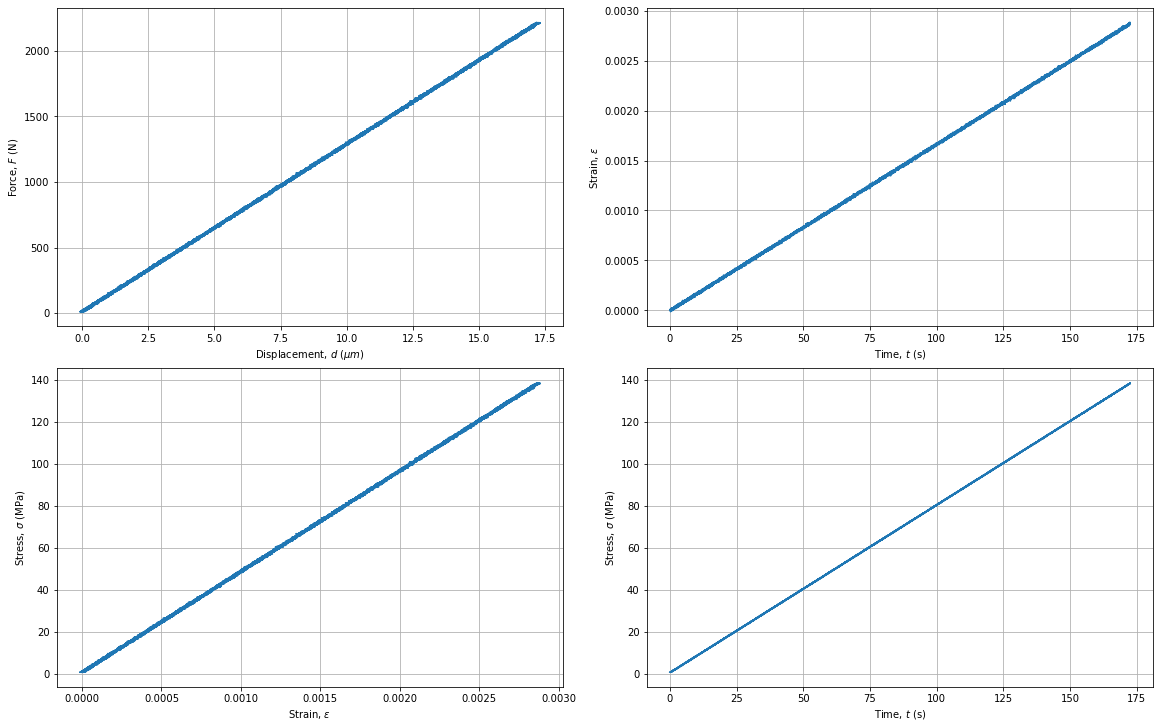

In [41]:
# Reset time and displacement to start from zero
t -= t[0]
d -= d[0]

# Calculate stress and strain
area = 4 * 4  # mm^2
stress = f / area  # N/mm^2 or MPa
l_0 = 6000  # initial length (um)
strain = d / l_0

# Create 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10), layout="constrained")

# First subplot
axs[0, 0].plot(d, f)
axs[0, 0].set_xlabel(r"Displacement, $d$ ($\mu m$)")
axs[0, 0].set_ylabel(r"Force, $F$ (N)")
axs[0, 0].grid(True)

# Second subplot
axs[0, 1].plot(t, strain)
axs[0, 1].set_xlabel(r"Time, $t$ (s)")
axs[0, 1].set_ylabel(r"Strain, $\epsilon$")
axs[0, 1].grid(True)

# Third subplot
axs[1, 0].plot(strain, stress)
axs[1, 0].set_xlabel(r"Strain, $\epsilon$")
axs[1, 0].set_ylabel(r"Stress, $\sigma$ (MPa)")
axs[1, 0].grid(True)

# Fourth subplot
axs[1, 1].plot(t, stress)
axs[1, 1].set_xlabel(r"Time, $t$ (s)")
axs[1, 1].set_ylabel(r"Stress, $\sigma$ (MPa)")
axs[1, 1].grid(True)

### Question 4.2
*5 points*

Calculate the strength (in MPa) and failure strain (in %) for the sample tested above.

Report 2 decimal places for strength and 4 for strain.

In [42]:
# For the brittle material
# Strength = Maximum stress
strength = stress.max()  # MPa
print(f"Specimen strength = {strength:.2f} MPa")

# Failure strain  = Maximum strain
failure_strain = strain.max() * 1e2  # %
print(f"Specimen Failure strain = {failure_strain:.4f} %")

Specimen strength = 138.56 MPa
Specimen Failure strain = 0.2884 %


### Question 4.3
*10 points*

Experimental data (including the data provided above) is practically always noisy. Hence, to obtain the elastic modulus from the stress-strain data is not as straight-forward as dividing two arrays.

A better option is to fit a linear curve to the cleaned stress-strain data. Check the documentation for `numpy.polyfit` and calculate the elastic modulus (in GPa) of the test specimen. Report 2 decimal places for the modulus.

In [43]:
# Fit 1D polynomial to the data
e = np.polyfit(strain, stress, 1)
modulus = e[0] * 1e-3  # GPa
print(f"Specimen elastic modulus = {modulus:.2f} GPa")

Specimen elastic modulus = 47.99 GPa


**Extra information:**

Visualize the polynomial: $y = mx + c$


In [44]:
print(np.poly1d(e))

 
4.799e+04 x + 0.6388


$\sigma = E \epsilon + \sigma_{threshold}$
- $m$ is the slope, i.e., the elastic modulus, $E$
- $c$ is the $y$-intercept for the stress, which corresponds to the threshold used for cleaning the force data

In [45]:
threshold_stress = threshold / area
threshold_stress

0.625

## Question 5
*10 points*

Follow the instructions below to create a scatter plot. Refer to the relevant documentation when needed.

Using `numpy` functions, create two arrays with 100 random values:
- an array `x`, with a normal distribution, centered on 100 and with a standard deviation of 15
- an array `y`, with a uniform distribution between $\pi/2$ and $2\pi$.

In [46]:
x = np.random.normal(loc=100, scale=15, size=(100,))
y = np.random.uniform(low=np.pi / 2, high=2 * np.pi, size=(100,))

Create a scatter plot using the normal distribution array as the $x$-axis, and the uniform distribution array as the $y$-axis.

- The figure size should be at least `(10,10)`
- The marker size for each point on the plot should correspond to the ratio of $x/y$ for that point.
- The marker color for each point on the plot should correspond to the sine of $y$.
- Each marker should have a transparency of 50%.

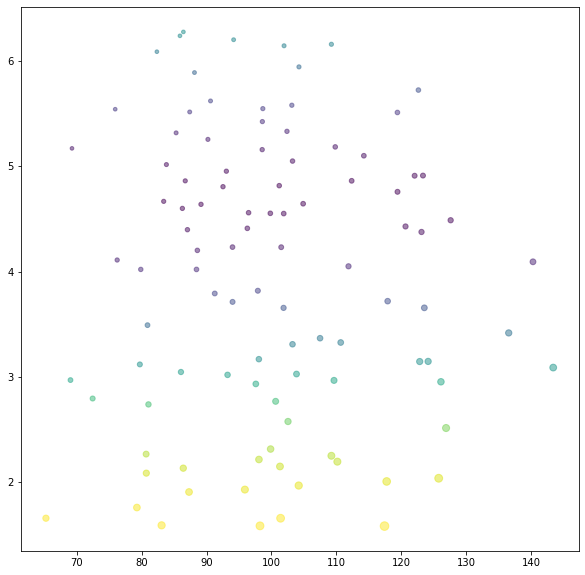

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, s=x / y, c=np.sin(y), alpha=0.50);

# Notes

## Vectorized NumPy operations on arrays vs Python Loops

Using NumPy features like masking, casting, and ufuncs (e.g., `np.add()`) is orders of magnitude faster than using Python loops.

In [48]:
# Import CSV file
data = np.genfromtxt("UTM_data.csv", delimiter=",", skip_header=1)

**Using a loop**

In [49]:
%%timeit

# Separate time, displacement and force arrays
t = data[:, 0]  # s
d = data[:, 1]  # um
f = data[:, 2]  # N

# Clean data by removing all indexes where force < 10 N
threshold = 10
clean_indexes = []
for i, f_i in enumerate(f):
    if f_i > threshold:
        clean_indexes.append(i)

t = t[clean_indexes]
d = d[clean_indexes]
f = f[clean_indexes]

# Reset time and displacement to start from zero
t -= t[0]
d -= d[0]

10.4 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Using a mask**

In [50]:
%%timeit

# Separate time, displacement and force arrays
t = data[:, 0]  # s
d = data[:, 1]  # um
f = data[:, 2]  # N

# Clean data by removing all indexes where force < 10 N
threshold = 10
t = t[f > threshold]
d = d[f > threshold]
f = f[f > threshold]

# Reset time and displacement to start from zero
t -= t[0]
d -= d[0]

160 µs ± 3.96 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## NumPy vs SymPy

Use **Num**Py when your problem and variables are numerical (i.e., have a number as a value).

Use **Sym**Py when your problem and variables are symbolic (i.e., no number for the value, you need your answer in variables like $x$ and $y$.

NumPy is written in C, and is much faster.

**SymPy and `lambdify()`**

In [51]:
%%timeit

theta = sym.symbols('theta', positive=True, real=True)
v = 25
g = 9.81

d = v ** 2 * sym.sin(2 * theta) / g
angles = np.linspace(0, 180)
f = sym.lambdify(theta, d, "numpy")
d_plot = f(angles)

823 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**NumPy**

In [52]:
%%timeit

v = 25
g = 9.81

angles = np.linspace(0, 180)
d = v ** 2 * np.sin(2 * np.radians(angles)) / g

34.7 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
